In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import numpy as np , pandas as pd, matplotlib.pyplot as plt


Classes:['setosa' 'versicolor' 'virginica']
Features:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


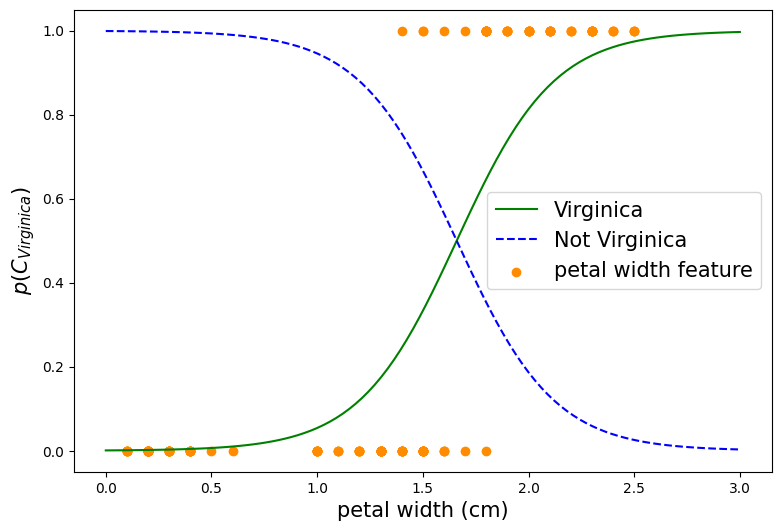

Training accuracy:0.96


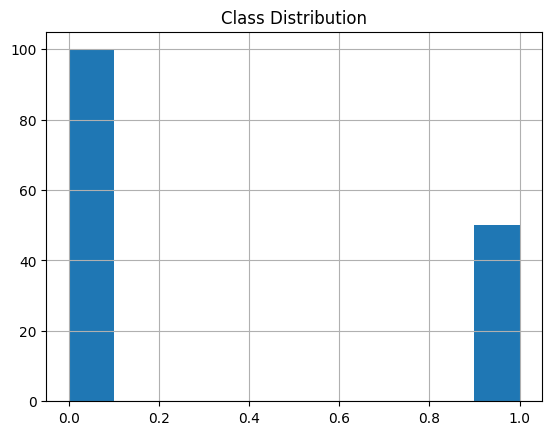

In [3]:
#binary logistic regression

iris=load_iris()
print(f'Classes:{iris.target_names}')
print(f'Features:{iris.feature_names}')
x=iris.data[:,3:] #take petal width feature only
y=(iris.target==2).astype(int) #virginica 1 , not virginiva 0
#y=iris.target

logreg=LogisticRegression(solver='lbfgs')
logreg.fit(x,y)

x_graph=np.linspace(0,3,100).reshape(-1,1) #as shape of x
y_proba=logreg.predict_proba(x_graph) #probability of virginica and not virginica
 
plt.figure(figsize=(9,6))
plt.plot(x_graph,y_proba[:,1],'g-',label='Virginica')
plt.plot(x_graph,y_proba[:,0],'b--',label='Not Virginica')
plt.scatter(x.ravel(),y,color='darkorange',label='petal width feature')

plt.legend(fontsize=15)
plt.xlabel('petal width (cm)',fontsize=15)
plt.ylabel('$p(C_{Virginica})$',fontsize=15)
plt.show() 

y_train_predicted=logreg.predict(x)
print('Training accuracy:{}'.format(accuracy_score(y,y_train_predicted)))

plt.figure()
plt.hist(y)
plt.grid()
plt.title('Class Distribution')
plt.show()

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [5]:
y_proba

array([[9.99249051e-01, 7.50949397e-04],
       [9.99143785e-01, 8.56214900e-04],
       [9.99023778e-01, 9.76221743e-04],
       [9.98886970e-01, 1.11302997e-03],
       [9.98731014e-01, 1.26898623e-03],
       [9.98553237e-01, 1.44676322e-03],
       [9.98350595e-01, 1.64940451e-03],
       [9.98119625e-01, 1.88037536e-03],
       [9.97856380e-01, 2.14362028e-03],
       [9.97556372e-01, 2.44362819e-03],
       [9.97214494e-01, 2.78550615e-03],
       [9.96824937e-01, 3.17506262e-03],
       [9.96381099e-01, 3.61890134e-03],
       [9.95875473e-01, 4.12452709e-03],
       [9.95299535e-01, 4.70046460e-03],
       [9.94643608e-01, 5.35639187e-03],
       [9.93896711e-01, 6.10328936e-03],
       [9.93046394e-01, 6.95360644e-03],
       [9.92078554e-01, 7.92144645e-03],
       [9.90977228e-01, 9.02277163e-03],
       [9.89724371e-01, 1.02756290e-02],
       [9.88299602e-01, 1.17003980e-02],
       [9.86679940e-01, 1.33200597e-02],
       [9.84839511e-01, 1.51604886e-02],
       [9.827492

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Softmax gives us a probability distribution across the classes:[[7.80951596e-16 9.38491293e-01 6.15087073e-02]]


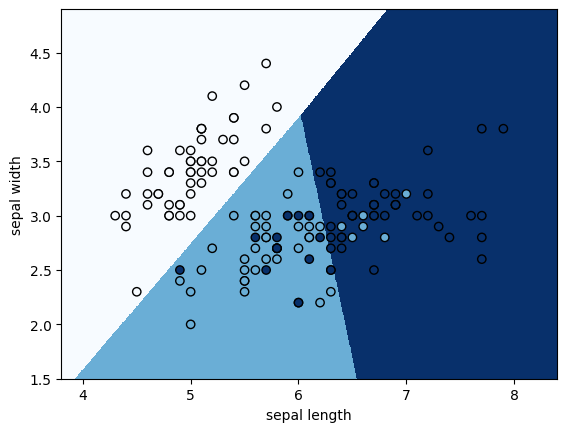

In [6]:
# multi class logistic regression
iris=load_iris()
print(iris.feature_names)
x=iris.data[:,:2] #take sepal length and sepal width features
y=iris.target

logreg=LogisticRegression(C=1e5,solver='lbfgs',multi_class='multinomial')
logreg.fit(x,y)

#plot the decision boundary. for that we will assign a color to each
cmap=plt.cm.Blues
x_min,x_max,y_min,y_max=x[:,0].min()-.5,x[:,0].max()+.5,x[:,1].min()-.5,x[:,1].max()+.5
h=.005 #step size in the mesh
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

z=logreg.predict(np.c_[xx.ravel(),yy.ravel()])  

#put the result into a color plot
z=z.reshape(xx.shape)
plt.figure(1)
plt.pcolormesh(xx,yy,z,cmap=cmap)

#plot the trainig points
plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',cmap=cmap)
plt.xlabel('sepal length')
plt.ylabel('sepal width')

plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())

#plt.xticks(())
#plt.yticks(())

print('\nSoftmax gives us a probability distribution across the classes:{}'.format(logreg.predict_proba([[5,2]])))

In [7]:
print(1e5)

100000.0


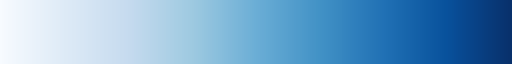

In [8]:
cmap

In [9]:
xx.shape

(681, 921)

In [10]:
xx.ravel().shape

(627201,)

In [11]:
np.c_[xx,yy].shape

(681, 1842)

In [12]:
np.c_[xx.ravel(),yy.ravel()].shape

(627201, 2)

In [13]:
np.r_[xx.ravel(),yy.ravel()].shape

(1254402,)

In [14]:
pd.DataFrame(z).value_counts()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104  105  106  107  108  109  110  111  112  113  114  115  116  117  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  134  135  136  137  138  139  140  141  142  143  144  145  146  147  148  149  150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  195  196  197  198  199  200  201  202  203  204  205  206  207  208  209  210  211  212  213  214  215  216  217  218  219  220  221  

In [15]:
z.shape

(681, 921)

In [16]:
z.shape

(681, 921)

In [17]:
x.shape

(150, 2)

/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training score: 0.998 (multinomial)


/tmp/ipykernel_7089/1302317275.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[index,0],x[index,1],c=color,edgecolors='k',cmap=cmap)
/home/mohammad-hossein-abedi/Documents/Code/Packtpub_ML_Training/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Training score: 0.984 (ovr)


/tmp/ipykernel_7089/1302317275.py:41: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x[index,0],x[index,1],c=color,edgecolors='k',cmap=cmap)


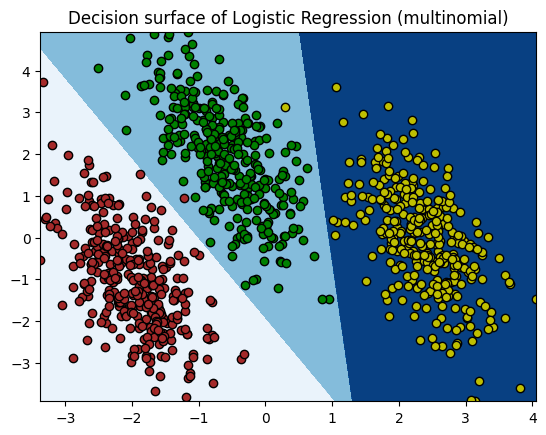

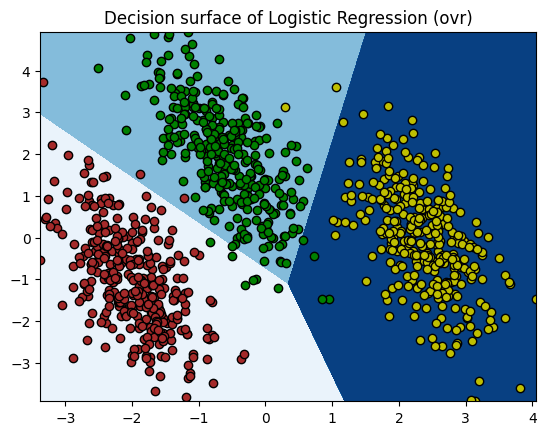

In [58]:
#decision surface of multinomial and one_vs_rest logistic regression

from sklearn.datasets import make_blobs

#make 3-class datasets for classification
centers=[[-5,0],[0,1.5],[5,-1]]
x,y=make_blobs(n_samples=1000,centers=centers,random_state=42)

transformation=[[.4,.2],[-.4,1.2]]
x=np.dot(x,transformation)
cmap=plt.cm.Blues

for multiclass in ('multinomial','ovr'):
    clf=LogisticRegression(solver='sag',max_iter=100,random_state=43,multi_class=multiclass).fit(x,y)
    
    #print the training score
    print('Training score: %s (%s)'%(clf.score(x,y),multiclass))
    
    #create a mesh to plot in
    h=.005 #step size in the mesh
    x_min,x_max=x[:,0].min(),x[:,0].max()
    y_min,y_max=x[:,1].min(),x[:,1].max()
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    #plot the decision boundary. for that we will assign a color to each
    #point in the mesh [x_min,x_max]x[y_min,y_max]
    z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    #put the result into a color plot
    z=z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx,yy,z,cmap=cmap)
    plt.title('Decision surface of Logistic Regression (%s)'%(multiclass))
    plt.axis('tight')
    
    #plot training points
    #plt.scatter(x[:,0],x[:,1],c=y,edgecolors='k',cmap=cmap,s=40)
    colors=['BROWN','g','y']
    for i,color in zip(clf.classes_,colors):
        index=np.where(y==i)
        plt.scatter(x[index,0],x[index,1],c=color,edgecolors='k',cmap=cmap)

In [19]:
x.shape #shape is as given centers shape(in this case is 2 columns)

(1000, 2)

In [20]:
pd.DataFrame(y).value_counts() #number of features is as given centers number of classes (in this case is 3 classes)

0
0    334
1    333
2    333
Name: count, dtype: int64

In [21]:
multiclass

'ovr'

In [22]:
print('%a   %a'%(np.pi,np.pi/10))

3.141592653589793   0.3141592653589793


In [23]:
xx.shape

(1771, 1488)

In [24]:
yy.shape #2,635,248

(1771, 1488)

In [25]:
z.shape

(1771, 1488)

In [26]:
clf.classes_

array([0, 1, 2])

In [27]:
clf.n_features_in_

2

In [47]:
aa=np.where(y==2)
print(aa)

(array([  0,   1,   3,   6,   9,  15,  18,  23,  27,  28,  31,  33,  38,
        40,  42,  55,  56,  61,  69,  72,  73,  78,  79,  85,  91, 103,
       104, 105, 106, 110, 112, 114, 115, 117, 126, 131, 133, 138, 140,
       141, 146, 148, 151, 159, 165, 166, 168, 173, 175, 181, 182, 191,
       193, 194, 196, 203, 205, 206, 209, 213, 219, 220, 221, 224, 226,
       228, 229, 234, 235, 236, 249, 254, 257, 259, 265, 267, 268, 270,
       278, 279, 285, 287, 289, 292, 294, 297, 298, 299, 300, 301, 304,
       307, 308, 309, 310, 311, 312, 313, 319, 321, 323, 326, 329, 332,
       333, 345, 348, 349, 352, 355, 359, 362, 366, 368, 369, 371, 373,
       378, 387, 389, 393, 395, 397, 399, 401, 408, 411, 412, 413, 415,
       418, 419, 420, 421, 423, 425, 430, 432, 433, 436, 438, 439, 448,
       449, 452, 455, 456, 463, 468, 474, 476, 477, 479, 480, 481, 483,
       492, 493, 495, 497, 498, 502, 513, 522, 530, 531, 533, 538, 539,
       546, 554, 562, 564, 565, 566, 569, 570, 571, 573, 575, 5

In [35]:
y.shape

(1000,)

In [44]:
list(zip(clf.classes_,colors))


[(0, 'r'), (1, 'g'), (2, 'y')]

In [49]:
x[aa,0].shape

(1, 333)

In [52]:
x[:,:][y==2].shape

(333, 2)